In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
%matplotlib inline

In [2]:
df=pd.read_csv('advertising.csv')
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB


In [4]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [5]:
df.shape

(200, 4)

In [6]:
df.skew()

TV          -0.069853
Radio        0.094175
Newspaper    0.894720
Sales       -0.073739
dtype: float64

In [7]:
df.kurtosis()

TV          -1.226495
Radio       -1.260401
Newspaper    0.649502
Sales       -0.640075
dtype: float64

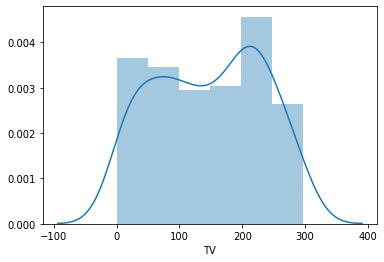

In [8]:
sns.distplot(df['TV'])

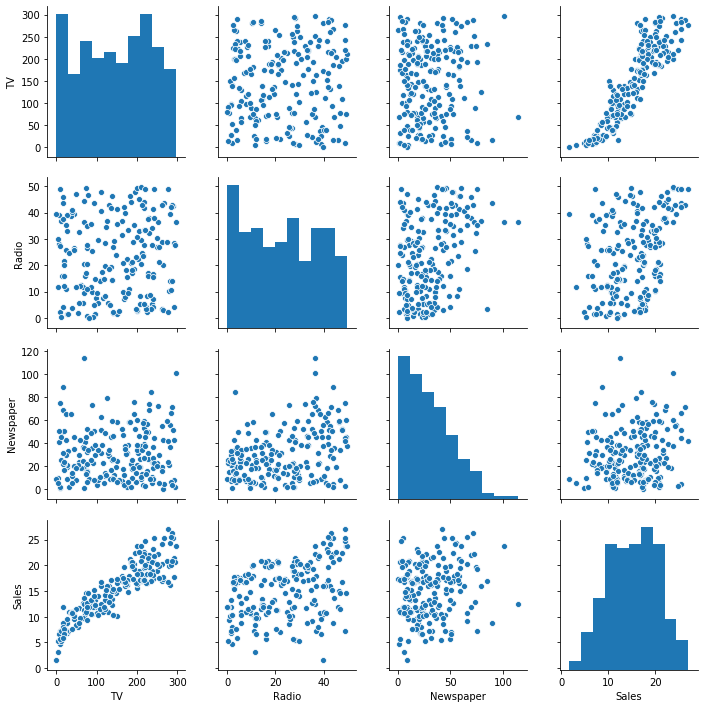

In [9]:
sns.pairplot(df)

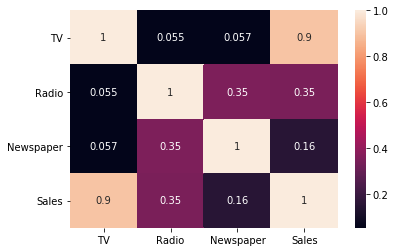

In [10]:
sns.heatmap(df.corr(),annot=True)

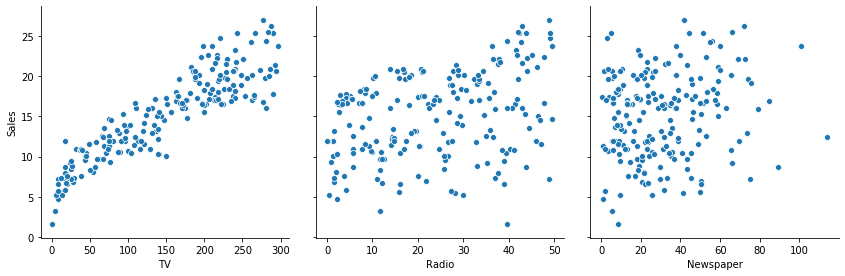

In [11]:
sns.pairplot(df,x_vars=['TV','Radio','Newspaper'],y_vars='Sales',size=4,aspect=1,kind='scatter')

In [12]:
X=df[['TV']]
y=df[['Sales']]

In [13]:
print(X.shape)
print(y.shape)

(200, 1)
(200, 1)


In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=101)

In [15]:
import statsmodels.api as sm

In [16]:
#add constant to get an intercept
X_train_sm=sm.add_constant(X_train)
X_test_sm=sm.add_constant(X_test)
#fit the regression line using OLS
lr=sm.OLS(y_train,X_train_sm).fit()

In [17]:
lr.params

const    6.802410
TV       0.056235
dtype: float64

In [18]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     691.5
Date:                Tue, 24 Sep 2019   Prob (F-statistic):           1.37e-59
Time:                        07:34:45   Log-Likelihood:                -359.46
No. Observations:                 160   AIC:                             722.9
Df Residuals:                     158   BIC:                             729.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.8024      0.368     18.496      0.0

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [20]:
vif=pd.DataFrame()
vif['Features']=X_train_sm.columns
vif['VIF']=[variance_inflation_factor(X_train_sm.values,i) for i in range(X_train_sm.shape[1])]
vif["VIF"]=round(vif["VIF"],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
0,const,4.08
1,TV,1.00


In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
lm=LinearRegression()

In [23]:
lm.fit(X_train_sm,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
print(lm.intercept_)

[6.80241026]


In [25]:
print(lm.coef_)

[[0.         0.05623465]]


In [26]:
X_train_sm.shape

(160, 2)

In [27]:
# X_test_sm=sm.add_constant(X_test)

In [28]:
y_pred=lm.predict(X_test_sm)
y_pred

array([[11.00313896],
       [21.16474106],
       [13.15130277],
       [12.97697534],
       [ 8.57380188],
       [ 7.89336256],
       [21.57525404],
       [18.80288557],
       [14.69213231],
       [19.20215161],
       [ 8.93932714],
       [16.68283909],
       [19.30899746],
       [17.98748307],
       [17.69506287],
       [ 9.31609932],
       [21.58650097],
       [12.18406671],
       [ 9.61414299],
       [19.62391152],
       [ 7.90460949],
       [16.4354066 ],
       [22.37378614],
       [21.49652553],
       [10.68260143],
       [18.03809426],
       [23.31290487],
       [10.15399568],
       [16.11486907],
       [ 7.76964632],
       [ 8.14079504],
       [19.16278736],
       [14.35472438],
       [ 7.5447077 ],
       [16.75594414],
       [12.26841869],
       [11.70607215],
       [12.09971473],
       [ 7.46035572],
       [15.60875718]])

In [30]:
y_pred_train=lm.predict(X_train_sm)
y_pred_train

array([[10.61511985],
       [14.64714459],
       [12.21218404],
       [ 7.85962177],
       [11.09873788],
       [10.69384836],
       [ 7.10607739],
       [19.5789238 ],
       [16.96963582],
       [17.79066178],
       [ 9.30485239],
       [18.43736031],
       [22.5593605 ],
       [13.39311179],
       [18.03809426],
       [ 7.03297234],
       [21.81143959],
       [ 9.02367912],
       [21.73833454],
       [16.64909829],
       [17.66694554],
       [22.97549694],
       [11.31242956],
       [17.0708582 ],
       [19.30899746],
       [20.91168512],
       [17.36327841],
       [11.19996025],
       [13.87110635],
       [14.17477349],
       [19.98943678],
       [10.30582924],
       [22.8855215 ],
       [11.09873788],
       [12.28528909],
       [18.97158953],
       [11.62172016],
       [20.47867828],
       [ 7.21292324],
       [19.85447361],
       [22.58747783],
       [14.20851428],
       [ 9.96279785],
       [18.33051447],
       [16.18235066],
       [20

In [31]:
from sklearn import metrics

metrics.r2_score(y_train,y_pred_train)

0.813997555689372

In [32]:
metrics.r2_score(y_test,y_pred)

0.8020448477134279

In [33]:
MSE=cross_val_score(lin_reg,X1,y1,cv=5)
MSE

NameError: name 'cross_val_score' is not defined

In [34]:
mean_MSE=np.mean(MSE)
print(mean_MSE)

NameError: name 'MSE' is not defined

In [35]:
print('MAE',metrics.mean_absolute_error(y_test,y_pred))
print('MSE',metrics.mean_squared_error(y_test,y_pred))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE 1.770678380671916
MSE 5.188919224826999
RMSE 2.2779199338051805


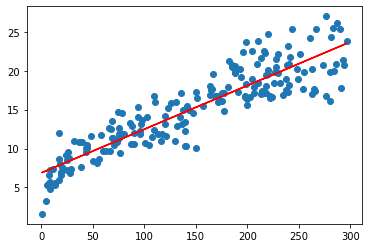

In [36]:
plt.scatter(df.TV,df.Sales)
plt.plot(df.TV,( 0.056118*df.TV)+6.873404,'R')